In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import math

In [2]:
class K_Means:
    
    def __init__(self, k=2, tolerance = 0.001, max_iter = 500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance
    
    def euclidean_distance(self, point1, point2):
        #return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 + (point1[2]-point2[2])**2)   #sqrt((x1-x2)^2 + (y1-y2)^2)
        return np.linalg.norm(point1-point2, axis=0)
        
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        
        for i in range(self.max_iterations):
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []
                
            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point,self.centroids[index]))
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)
            
            previous = dict(self.centroids)
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0)
            

                
            isOptimal = True
            
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break


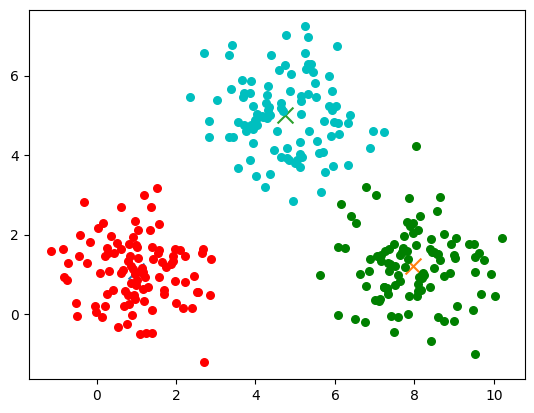

In [3]:
K=3
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
cluster_1 = np.random.randn(100, 2) + center_1
cluster_2 = np.random.randn(100,2) + center_2
cluster_3 = np.random.randn(100,2) + center_3

data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)

k_means = K_Means(K)
k_means.fit(data)


# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]

for centroid in k_means.centroids:
    plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 130, marker = "x")

for cluster_index in k_means.classes:
    color = colors[cluster_index]
    for features in k_means.classes[cluster_index]:
        plt.scatter(features[0], features[1], color = color,s = 30)

### Using Scikit

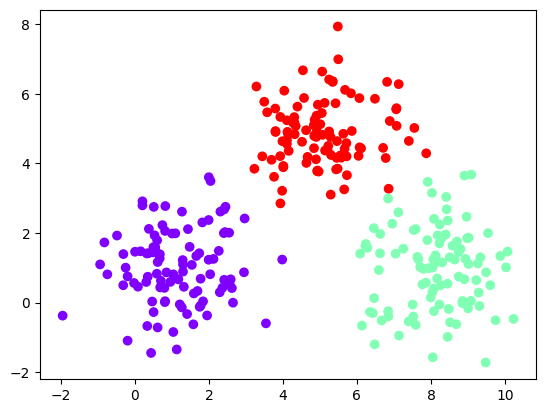

In [4]:
from sklearn.cluster import KMeans
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

    # Generate random data and center it to the three centers
cluster_1 = np.random.randn(100,2) + center_1
cluster_2 = np.random.randn(100,2) + center_2
cluster_3 = np.random.randn(100,2) + center_3

data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
plt.scatter(data[:,0],data[:,1], c=kmeans.labels_, cmap='rainbow')